In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('Dummy Data HSS.csv')
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [58]:
# Get general idea about data like non null values, data types.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [59]:
df.dropna(inplace = True)
df.shape

(4546, 5)

In [60]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['Influencer'] = le.fit_transform(df.Influencer.values)
df['Influencer'].value_counts()

1    1152
2    1148
3    1134
0    1112
Name: Influencer, dtype: int64

In [61]:
df.corr()

,TV,Radio,Social Media,Influencer,Sales
TV,1.000000,0.869158,0.527687,-0.013724,0.999497
Radio,0.869158,1.000000,0.606338,-0.010696,0.868638
Social Media,0.527687,0.606338,1.000000,-0.020689,0.527446
Influencer,-0.013724,-0.010696,-0.020689,1.000000,-0.014067
Sales,0.999497,0.868638,0.527446,-0.014067,1.000000


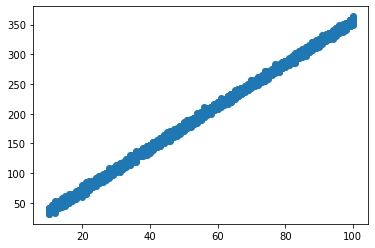

In [62]:
# TV and Sales have very strong corelation. Let's show them in a scatter plot.

plt.scatter(df['TV'], df['Sales'])

# It has a Strong Postive Linear Corelation

In [63]:
# Assign x and y variables 

x = df['TV']
y = df['Sales']

In [64]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 100)

In [65]:
# fit the model

import statsmodels.api as sm

x_train_with_intercept = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_with_intercept).fit()

# Printing the parameters
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 3.699e+06
Date:                Mon, 16 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:11:28   Log-Likelihood:                -9060.9
No. Observations:                3636   AIC:                         1.813e+04
Df Residuals:                    3634   BIC:                         1.814e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1123      0.112     -1.003      0.316      -0.332       0.107
TV             3.5609      0.002   1923.234      0.000       3.557       3.565
==============================================================================
Omnibus:                        0.149   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.157
Skew:                           0.016   Prob(JB):                        0.924
Kurtosis:                       2.991   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const   -0.112348
TV       3.560880
dtype: float64


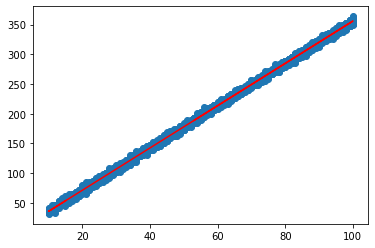

In [66]:
#Extract the B0, B1

print(lr.params)
b0=lr.params[0]
b1=lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.show()

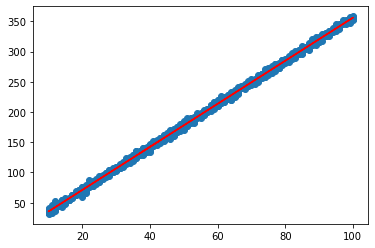

In [67]:
#Plot the fitted line on test data

x_test_intercept = sm.add_constant(x_test)
y_test_fitted = lr.predict(x_test_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

In [68]:
predictions = lr.predict(x_test_intercept)

# Calculating the RMSE value

import sklearn.metrics as metrics

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

RMSE : 3.044082237077422
